In [1]:
%matplotlib inline                

# Example 2:  Reading a GRIB data set

GRIB (GRIdded Binary or General Regularly-distributed Information in Binary form) can be read with any of the following libraries or ways:

- **pygrib**

- **xarray (with the PyNIO engine option)**

- **PyNIO**

- **wgrib2 or CDO to convert to NetCDF**

In this example we'll use pygrib to read a WAVEWATCH III dataset, plot the parameter Significant Wave Height (SWH), and select a subregion.

The pygrib library can be installed in several ways:  pip, conda (or whatever local package manager you're using for your python installation), or distutils (python setup.py).

- As before, start by importing the required libraries

In [2]:
import matplotlib.pyplot as plt    # graphics library
import pygrib
import numpy as np                 # numeric python library
import cartopy.crs as ccrs         # cartographic coord reference system
import cartopy.feature as cfeature # features: land, borders, coastlines

- Open the file and display the contents.

- GRIB files are record-oriented, and pygrib stores the GRIB records in a list-like object.

- You can access individual records by number or just iterate over the list.

In [3]:
gribs = pygrib.open('multi_1.glo_30mext.t00z.f000.grib2')

for grib in gribs:
    print(grib)

1:Wind speed:m s**-1 (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
2:Wind direction:Degree true (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
3:U component of wind:m s**-1 (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
4:V component of wind:m s**-1 (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
5:Significant height of combined wind waves and swell:m (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
6:Primary wave mean period:s (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
7:Primary wave direction:Degree true (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
8:Significant height of wind waves:m (instant):regular_ll:surface:level 1:fcst time 0 hrs:from 201808250000
9:Significant height of swell waves:m (instant):regular_ll:unknown:level 1 241:fcst time 0 hrs:from 201808250000
10:Significant height of swell waves:m (instant):r

- You can select from the list of GRIB records with long name, short name, or any of the other keys in the file.

- Note that the select method returns a list, even for a single message.

In [4]:
swh = gribs(shortName = 'swh',forecastTime = 0)[0]  # note single '=", not "=="

- There's a ***lot*** of information in each GRIB record

In [5]:
for key in swh.keys(): # doing some python string formatting here
    print('{:>25} {}'.format(key, eval('swh.'+key)))

        parametersVersion 1
       UseEcmfConventions 1
   GRIBEX_boustrophedonic 0
                  hundred [100 100]
             globalDomain g
        GRIBEditionNumber 2
      tablesVersionLatest 20
             grib2divider 1000000
         angularPrecision 1000000
             missingValue 9999
               ieeeFloats 1
               isHindcast 0
           section0Length 16
               identifier GRIB
               discipline 10
            editionNumber 2
              totalLength 113928
            sectionNumber [1 3 3 4 5 6 7]
           section1Length 21
          numberOfSection [1 3 4 5 6 7]
                   centre kwbc
        centreDescription US National Weather Service - NCEP
                subCentre 0
            tablesVersion 2
                masterDir grib2/tables/[tablesVersion]
       localTablesVersion 1
significanceOfReferenceTime 1
                     year 2018
                    month 8
                      day 25
                     hour 0
  

                 nameECMF Significant height of combined wind waves and swell
                     name Significant height of combined wind waves and swell
               cfNameECMF unknown
                   cfName unknown
            cfVarNameECMF swh
                cfVarName swh
                modelName unknown
                 ifsParam 140229
                PVPresent 0
                 deletePV 1
          lengthOfHeaders 127
            sectionNumber [1 3 3 4 5 6 7]
           section5Length 23
          numberOfSection [1 3 4 5 6 7]
           numberOfValues 141321
dataRepresentationTemplateNumber 40
              packingType grid_jpeg
           referenceValue 0.0
      referenceValueError 1.1754943508222875e-38
        binaryScaleFactor 0
       decimalScaleFactor 2
             bitsPerValue 10
typeOfOriginalFieldValues 0
    typeOfCompressionUsed 0
   targetCompressionRatio 255
            sectionNumber [1 3 3 4 5 6 7]
           section6Length 30246
          numberOfSecti

- Easiest way to get the data from the GRIB record is to use the `object.data()` method.

- This returns the parameter array and the lat/lon coordinate arrays for the model grid.

In [6]:
data, lats, lons = swh.data()

- Set up the plot figure as before and plot the SWH parameter

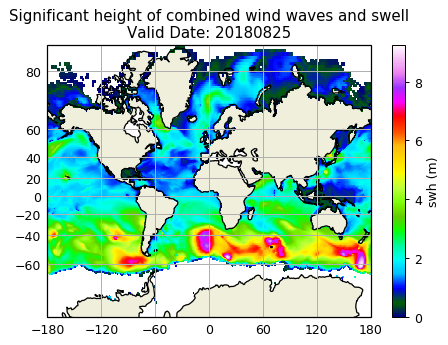

In [7]:
plt.figure(dpi = 90)
ax = plt.axes(projection = ccrs.Mercator()) # set up the axis projection
plt.pcolormesh(lons, lats, data, cmap = 'gist_ncar',transform = ccrs.PlateCarree())
cbar = plt.colorbar()
cbar.set_label(swh.shortName+' ('+swh.units+')')
ax.add_feature(cfeature.LAND)           # fill in the land areas
ax.coastlines()                         # use the default low-resolution coastline
gl = ax.gridlines(draw_labels = True)     # default is to label all axes.
gl.xlabels_top = False                  # turn off two of them.
gl.ylabels_right = False
plt.title(swh.name+'\n'+'Valid Date: '+swh.validDate.strftime('%Y%m%d'));

- Now let's look closer at the data itself.<br>
- First off, what is this thing?  You can identify the class of any python object with the `type()` function.

In [8]:
type(data)

numpy.ma.core.MaskedArray

- This is a numpy masked array.  A masked array is the combination of a standard numpy.ndarray and a Boolean mask of the same shape. The numpy package ensures that the masked data points are excluded from computations.

- As before, let's zoom in on Hawaii.  We'll use the `object.data()` method for that, too. Remember that the "%" is the python symbol for modulo division.

In [9]:
data, lats, lons = swh.data(lon1 = -166%360, lon2 = -150%360,
                            lat1 = 14, lat2 = 27)

- And now we can proceed to plot the swh parameter.

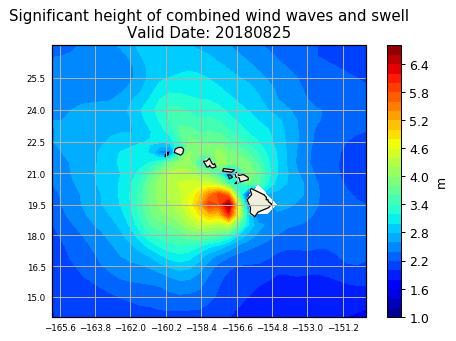

In [10]:
plt.figure(dpi = 90)
ax = plt.axes(projection = ccrs.Mercator())
plt.contourf(lons, lats, data, transform = ccrs.PlateCarree(), cmap='jet',
             levels = np.arange(np.floor(data.min()),np.ceil(data.max()),0.2))
plt.colorbar(label = swh.units)
ax.add_feature(cfeature.LAND,zorder = 1) # zorder will put the land on top 
ax.add_feature(cfeature.GSHHSFeature())
gl = ax.gridlines(draw_labels = True)       
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 'x-small'}
gl.ylabel_style = {'size': 'x-small'}
plt.title(swh.name+'\n'+'Valid Date: '+swh.validDate.strftime('%Y%m%d'));


## Next Example --  <a href="Python_tutorial_bufr.slides.html">Reading a BUFR file</a>